<a href="https://colab.research.google.com/github/seungukkim/R_lecture/blob/main/day30_mi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬
- Machine Learning
  + 정형데이터
  + 사이킷런
- Deep Learning
  + 비정형데이터
  + Tensorflow(구글)
  + Pytorch(페이스북)
  + 혼공머: Tensorflow
  + 실제 상용서비스 - Tensorflow
  + R&D- Pytorch

## 생선 분류
- 도미, 곤들매기, 농어 등등
- 이 생선들을 프로그램으로 분류한다.

-30cm 이상이면 도미라고 알려줘


## 도미의 길이와 무게를 줬다.

In [52]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

##데이터 가공
- 여기서는 생략

##데이터 시각화
- 여러인사이트 확인 위해 시각화, 통계 수치 계산
- 탐색적 자료분석(EDA:Exploratory Data analysis)

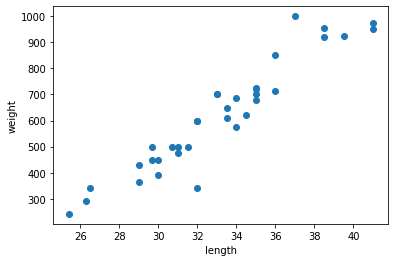

In [53]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 파이썬 시각화는 객체지향으로 한다.

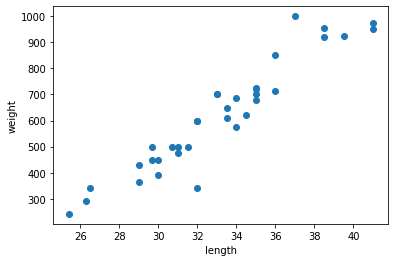

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비하기

In [56]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

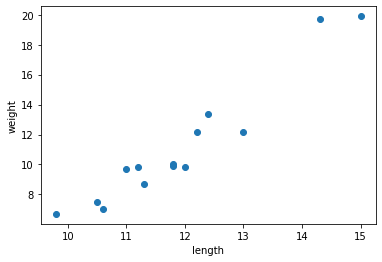

In [57]:
fig,ax = plt.subplots()

ax.scatter(smelt_length,smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

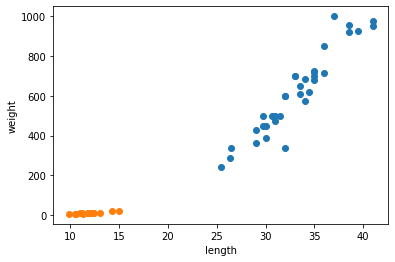

In [58]:
fig,ax = plt.subplots()
ax.scatter(bream_length,bream_weight)
ax.scatter(smelt_length,smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 두개의 리스트 합치기 

In [61]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 2차원리스트로 만든다.

In [62]:
fish_data = [[l,w]for l,w in zip(length,weight)]
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

- 라벨링을 해준다. = 지도 해준다.
=지도학습

In [63]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 모델링 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
#클래스 인스턴스화
kn=KNeighborsClassifier()

#모형 학습
kn.fit(fish_data,fish_target)


KNeighborsClassifier()

In [65]:
# 예측 정확도
kn.score(fish_data, fish_target)

1.0

- 실제 에측을 해보자
- 새로운 물고기 도착했습니다.
  + 길이: 30, 몸무게 : 600

In [66]:
kn.predict([[30,600]])

array([1])

In [68]:
ac_length = int(input("물고기 길이를 입력하세요 ..."))
ac_weight = int(input("물고기 무게를 입력하세요 ..."))

preds = kn.predict([[ac_length,ac_weight]])

if preds ==1:
  print("도미다")
else:
  print("빙어다")

물고기 길이를 입력하세요 ...13
물고기 무게를 입력하세요 ...58365
도미다


## 새로운 모델 제안 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

- 하이퍼 파라미터 세팅
- n_neighbors = 49
- default : 100%

## 머신러닝 알고리즘 두 개의 흐름
- 선형 모델: 선형 회귀, 로지스틱 회귀, 서포트 벡터 머신
- 의사결정트리 모델: 1975년 의사결정트리 모델, KNN, 
  + 랜덤포레스트
  + 부스팅계열 : LightGBM(2017), XGBoost(2016)

- 선형회귀, 로지스틱회귀, 랜덤포레스트, LightGBM(=XGBoost)

In [70]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 2차원 파이썬 리스트
- 라벨링

In [71]:
fish_data = [[l,w]for l,w in zip(fish_length,fish_weight)]

fish_target = [1]*35 + [0]*14
print(fish_target[0:40:5])
print(fish_data[0:40:5])


[1, 1, 1, 1, 1, 1, 1, 0]
[[25.4, 242.0], [29.7, 450.0], [31.0, 475.0], [32.0, 600.0], [34.0, 575.0], [35.0, 725.0], [38.5, 920.0], [9.8, 6.7]]


- Sample
- 도미 35마리, 빙어 14마리
- 49개의 샘플 존재
- 처음 35개를 훈련 /나머지 14개를 테스트

In [72]:
from sklearn.neighbors import KNeighborsClassifier
# 클래스 인스턴스화
kn = KNeighborsClassifier()

#훈련 세트로 0:34 인덱스 활용
train_input = fish_data[:35]
train_target = fish_target[:35]
#테스트 세트로 35:마지막 인덱스 활용
test_input = fish_data[35:]
test_target = fish_target[35:]
#모형 학습
kn=kn.fit(train_input,train_target)
print(kn.score(test_input,test_target))

0.0


- 샘플링 편향
- 훈련 세트와 테스트 세트가 골고루 섞이지 않음

## 샘플링 작업 

In [73]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr[0:49:7])
print(input_arr.shape, target_arr.shape)

[[ 25.4 242. ]
 [ 30.  390. ]
 [ 32.  600. ]
 [ 34.  685. ]
 [ 36.  850. ]
 [  9.8   6.7]
 [ 11.8   9.9]]
(49, 2) (49,)


In [139]:
target_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [152]:
# random으로 무작위 배열을 만들 때

index = np.arange(49) #0~48 생성
np.random.shuffle(index) # 섞어
np.random.seed(42) #고정
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [75]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [159]:
print(train_input)
print()
print(test_input)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]

[[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]]


In [160]:
train_input[:,0]

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

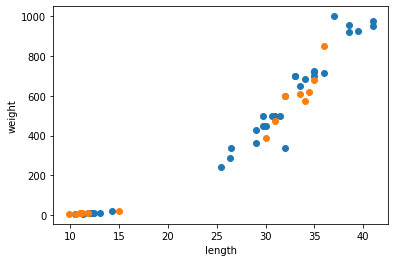

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(train_input[:,0], train_input[:,1])
ax.scatter(test_input[:,0], test_input[:,1])
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()
#파란색이 train 데이터
#주황색이 test 데이터

## 두번째 머신러닝 프로그램

In [78]:
kn.fit(train_input, train_target) # 훈련 시키고
kn.score(test_input,test_target) # 실제 데이터를 넣어서 어느정도 정확도를 보이는지 확인한다.

1.0

In [79]:
kn.predict(test_input)  # train으로 훈련을 하고 그 결과를 바탕으로 test_input을 넣어서 예측을 해본 값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [80]:
test_target # 실제 데이터

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

##데이터의 전처리 
- 머신러닝 시, 데이터 전처리
- 결측치 처리, 이상치 처리

In [81]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [82]:
# column_stack() 활용
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

- 독립 변수

In [83]:
fish_data = np.column_stack((fish_length,fish_weight))


- 종속변수 = Y = 타깃 데이터 = Target

In [84]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [85]:
np.ones(35)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [86]:
np.zeros(14)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### scikit-learn 훈련세트와 테스트 세트 나누기

In [87]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data,fish_target,random_state =42 #fish_data와 fish_target으로 random 분류한다.
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 클래스 인스턴스화
kn = KNeighborsClassifier()

#훈련 세트로 0:34 인덱스 활용
train_input = fish_data[:35]
train_target = fish_target[:35]
#테스트 세트로 35:마지막 인덱스 활용
test_input = fish_data[35:]
test_target = fish_target[35:]
#모형 학습
kn=kn.fit(train_input,train_target)
print(kn.score(test_input,test_target))

- p92 도미와 빙어가 잘 섞여 있나?

In [88]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 25(도미) : 14(빙어)
  + 2.5:1
- 테스트 셋(비율)
  + 3.3 : 1
  

In [93]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data,fish_target,stratify=fish_target,random_state =42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

## 층화샘플링
- 기초 통계, 설문조사
- 비율
- 여론 조사

## 수상한 도미 한 마리
- 

In [96]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input, test_target)

1.0

- 도미 사이즈 20cm 이상 = 1
- 빙어 사이즈

In [97]:
print(kn.predict([[25,150]]))

[0.]


In [161]:
train_input[:,0]

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

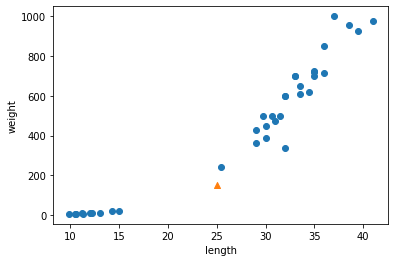

In [135]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(train_input[:,0],train_input[:,1])
ax.scatter(25,150,marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

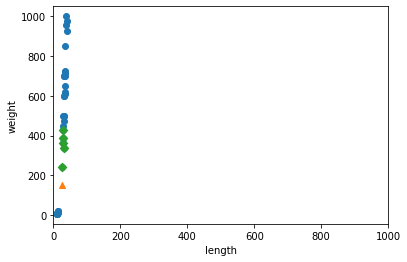

In [162]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- p98
- 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름
- 두 특성의 스케일이 다름
  + 스케일이 같도록 통계 처리 필요
  + Feature Engineering
- 머신러닝
  + 데이터 전처리 (결측치 처리, 이상치 처리)
  + 데이터 분리
  + Feature Engineering

## 표준 점수
- 점수


In [165]:
train_input
# 여기서 세로로 평균을 내는 것이 axis= 0

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [109]:
mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis =0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


- 표준 점수 구하기 

In [111]:
# 브로드캐스팅 서로 다른 배열을 계산할 때
print(train_input.shape, mean.shape, std.shape)
train_scaled = (train_input-mean)/std

(36, 2) (2,) (2,)


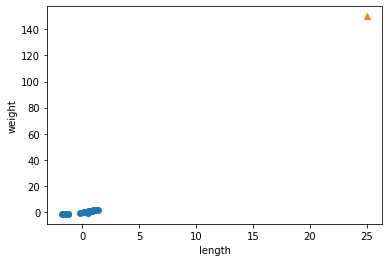

In [112]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

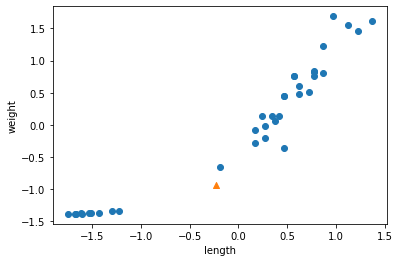

In [113]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

통계처리 전 : KNN -> 예측이 틀림
통계처리 후: KNN --> 예측이 정확하게 맞음
--> 통계처리 --> Feature Engineering

In [114]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [115]:
test_scaled = (test_input -mean)/std
kn.score(test_scaled, test_target)

1.0

- 예측 

In [117]:
print(kn.predict([new]))

[1.]


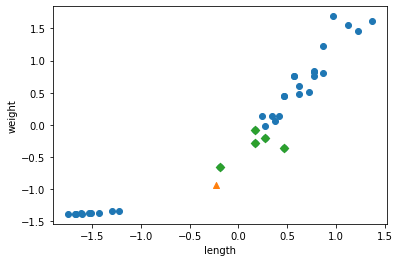

In [136]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()